# logistic map simulation

Our goal is to find the relation between the limit of the following series
$$
x_{n+1} = r x_n (1 - x_n)
$$
and the parameter $r$.

$$
x = r x(1-x)
$$

$$
x^2 + (\frac{1}{r} - 1)x = 0
$$

$$
x = 1 - \frac{1}{r}
$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time

In [67]:
x_series = []
r = 3.5

x_series.append(0.01)

for i in range(500000):
    x_series.append(r * x_series[-1] * (1 - x_series[-1]))
    
x_series_lim_4 = np.around(x_series[-100:], 4)
np.unique(x_series_lim_4)

array([0.3828, 0.5009, 0.8269, 0.875 ])

In [68]:
def logistic_map_lim(r, N = 500000):
    x_series = []
    x_series.append(0.01)

    for i in range(N):
        x_series.append(r * x_series[-1] * (1 - x_series[-1]))

    x_series_lim_4 = np.around(x_series[-100:], 4)
    return np.unique(x_series_lim_4)

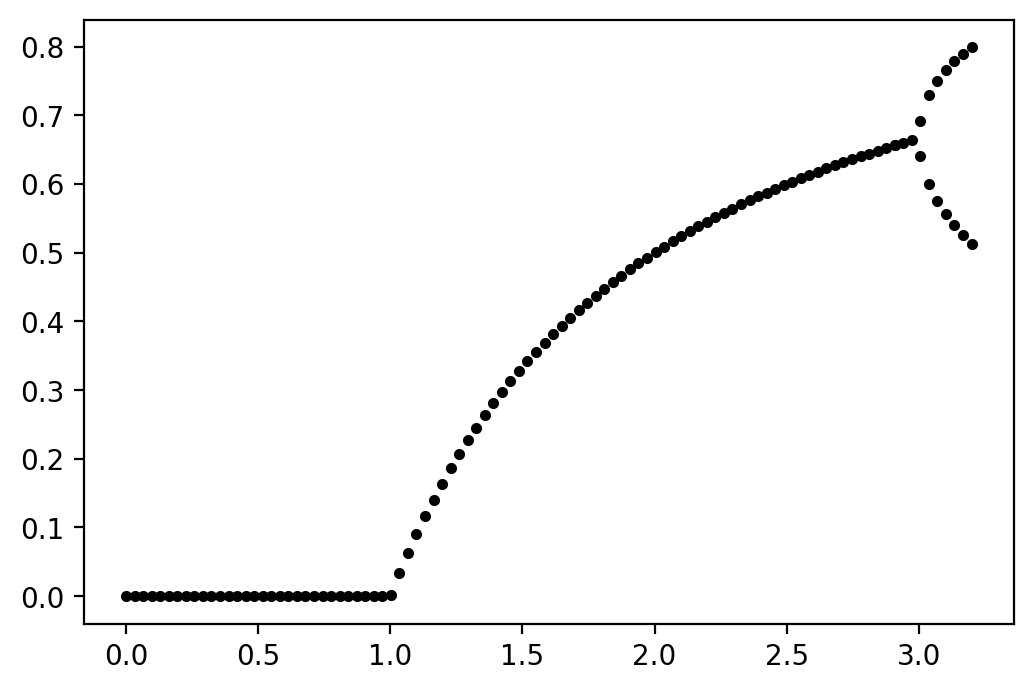

In [71]:
r = np.linspace(0, 3.2, 100)

plt.figure(figsize=(6, 4), dpi=200)
for R in r:
    series_lim = logistic_map_lim(R)
    for lim in series_lim:
        plt.plot(R, lim, '.', c='k')
plt.show()

In [77]:
r = np.linspace(0, 4.0, 200)

series_limits = []

for R in r:
    series_limits.append(logistic_map_lim(R))

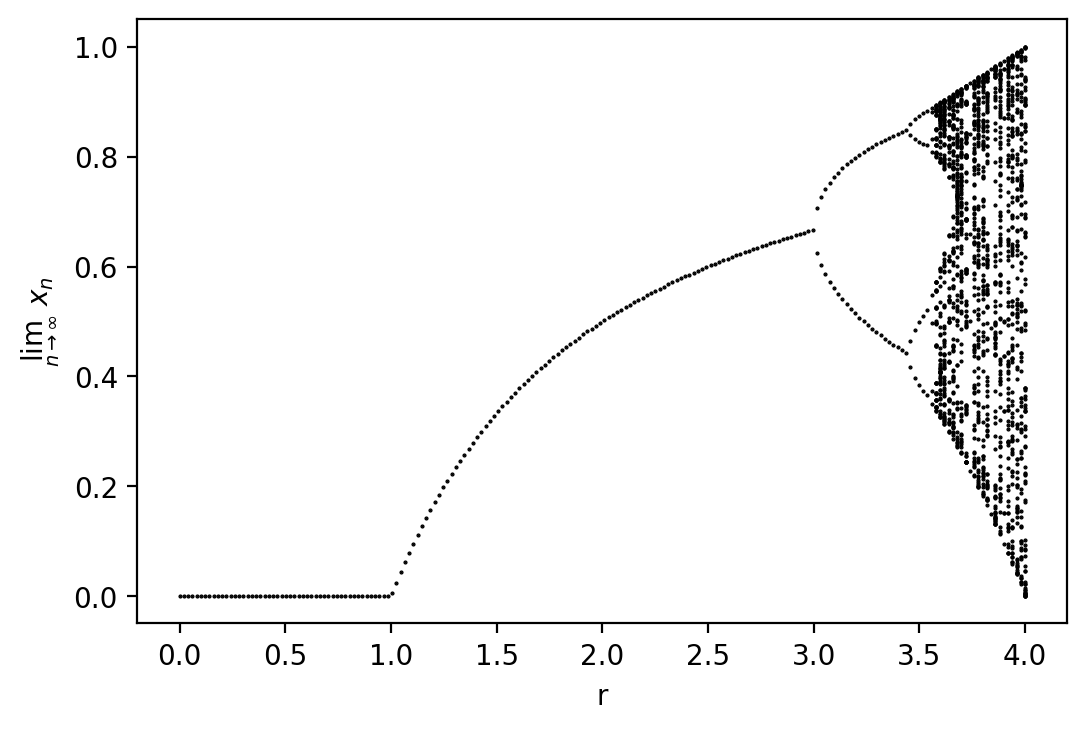

In [85]:
plt.figure(figsize=(6, 4), dpi=200)
for i in range(len(r)):
    for lim in series_limits[i]:
        plt.plot(r[i], lim, '.', c='k', markersize=1)
plt.xlabel('r')
plt.ylabel('$\lim_{n \\rightarrow \infty}~x_n$')
plt.show()

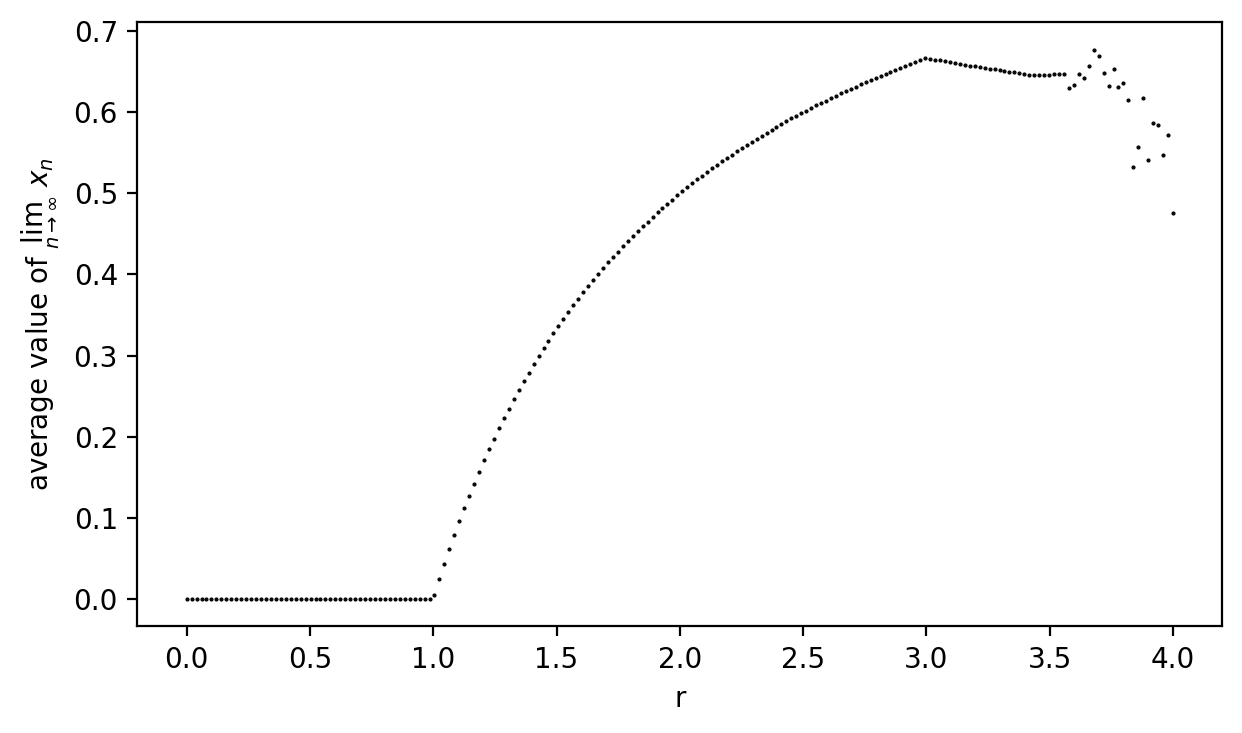

In [98]:
plt.figure(figsize=(7, 4), dpi=200)
for i in range(len(r)):
    plt.plot(r[i], np.average(series_limits[i]), '.', c='k', markersize=1)
    
plt.xlabel('r')
plt.ylabel('average value of $\lim_{n \\rightarrow \infty}~x_n$')
plt.show()

In [69]:
logistic_map_lim(3)

array([0.6663, 0.667 ])

In [48]:
x_series[-1]

0.8269407065914387

In [58]:
x_series_lim_4 = np.around(x_series[-100:], 4)

In [59]:
np.unique(x_series_lim_4)

array([0.3828, 0.5009, 0.8269, 0.875 ])

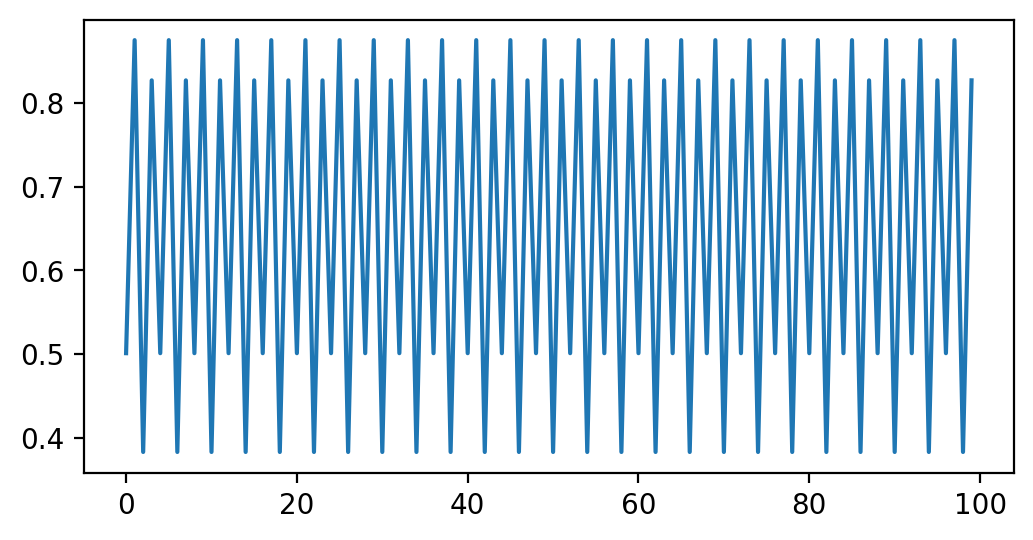

In [49]:
plt.figure(figsize=(6, 3), dpi=200)
plt.plot(range(100), x_series[-100:])
plt.show()

In [279]:
def logistic_map_lim_point(r, N = 500000, N_tail = 5000, decimal = 4):
    x_series = []
    x_series.append(0.01)

    for i in range(N):
        x_series.append(r * x_series[-1] * (1 - x_series[-1]))

    x_series_lim = np.around(x_series[-N_tail:], decimal)
    x_series_lim_unique = np.unique(x_series_lim)
    lim_point = np.zeros([2, len(x_series_lim_unique)])
    lim_point[0] = r * np.ones(len(x_series_lim_unique))
    lim_point[1] = x_series_lim_unique
    return lim_point

In [280]:
r = np.linspace(2.5, 3.5, 100)

lim_points = np.array([[], []])

for R in r:
    lim_points = np.concatenate((lim_points, logistic_map_lim_point(R, decimal = 8)), axis=1)

In [254]:
lim_points.shape

(2, 162)

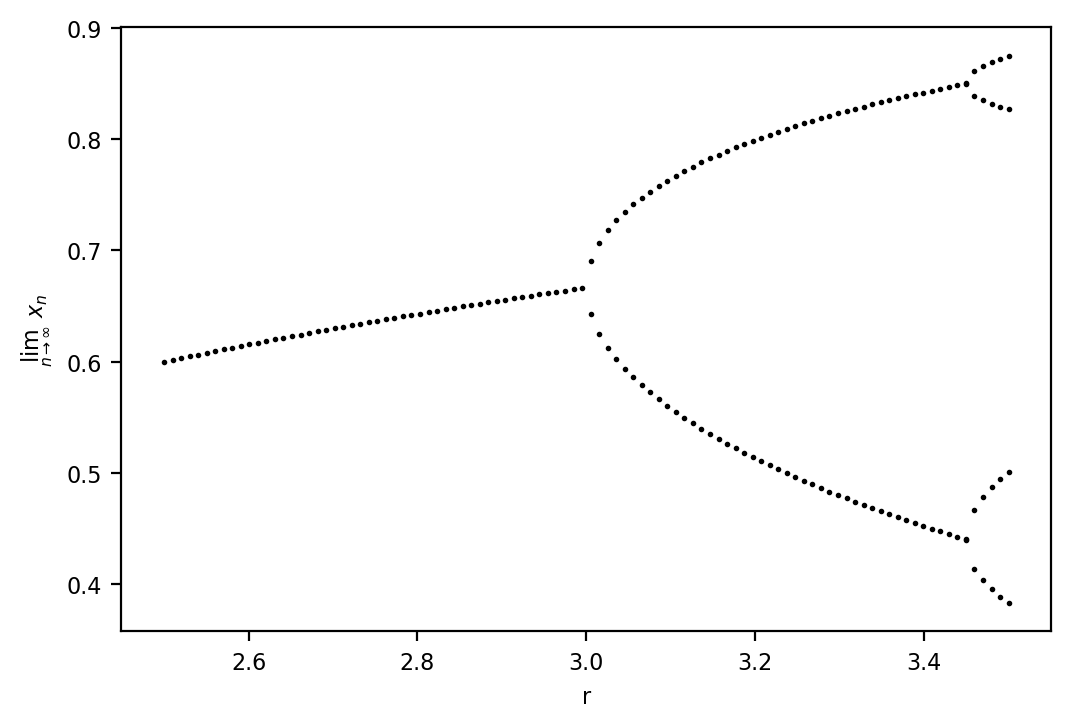

In [281]:
plt.figure(figsize=(6, 4), dpi=200)
plt.scatter(lim_points[0], lim_points[1], c='k', s = 1)
plt.xlabel('r')
plt.ylabel('$\lim_{n \\rightarrow \infty}~x_n$')
plt.show()

In [114]:
from multiprocessing import Pool

In [274]:
logistic_map_lim_point(3.5, N = 1000000, N_tail = 5000, decimal = 8)

array([[3.5       , 3.5       , 3.5       , 3.5       ],
       [0.38281968, 0.50088421, 0.82694071, 0.87499726]])

In [276]:
logistic_map_lim_point(3.5, N = 500000, N_tail = 5000, decimal = 8)

array([[3.5       , 3.5       , 3.5       , 3.5       ],
       [0.38281968, 0.50088421, 0.82694071, 0.87499726]])

In [272]:
logistic_map_lim_point(3.6, N = 500000, N_tail = 5000, decimal = 9)

array([[3.6       , 3.6       , 3.6       , ..., 3.6       , 3.6       ,
        3.6       ],
       [0.32400005, 0.32400021, 0.32400053, ..., 0.89999982, 0.89999993,
        0.89999998]])

In [277]:
def logistic_map_lim_points_child(r, N = 500000):
    lim_points = np.array([[], []])
    for R in r:
        lim_points = np.concatenate((lim_points, logistic_map_lim_point(R, N, N_tail = 5000, decimal = 8)), axis=1)
    return lim_points

In [282]:
r = np.linspace(0, 4, 1201)
rs = np.split(r[1:], 4)

# create threads (out side of the loop to prevent memory leak)
pool = Pool(processes = 4)

# set timer
start_time = time.time()

# calculate
results = pool.map(logistic_map_lim_points_child, rs)

# close threads
pool.close()

# processing results
lim_points = np.array([[0], [0]])
for result in results:
    lim_points = np.concatenate((lim_points, result), axis=1)

# print elapsed time
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

Time consuming: 83.849s.


In [283]:
lim_points.shape

(2, 601296)

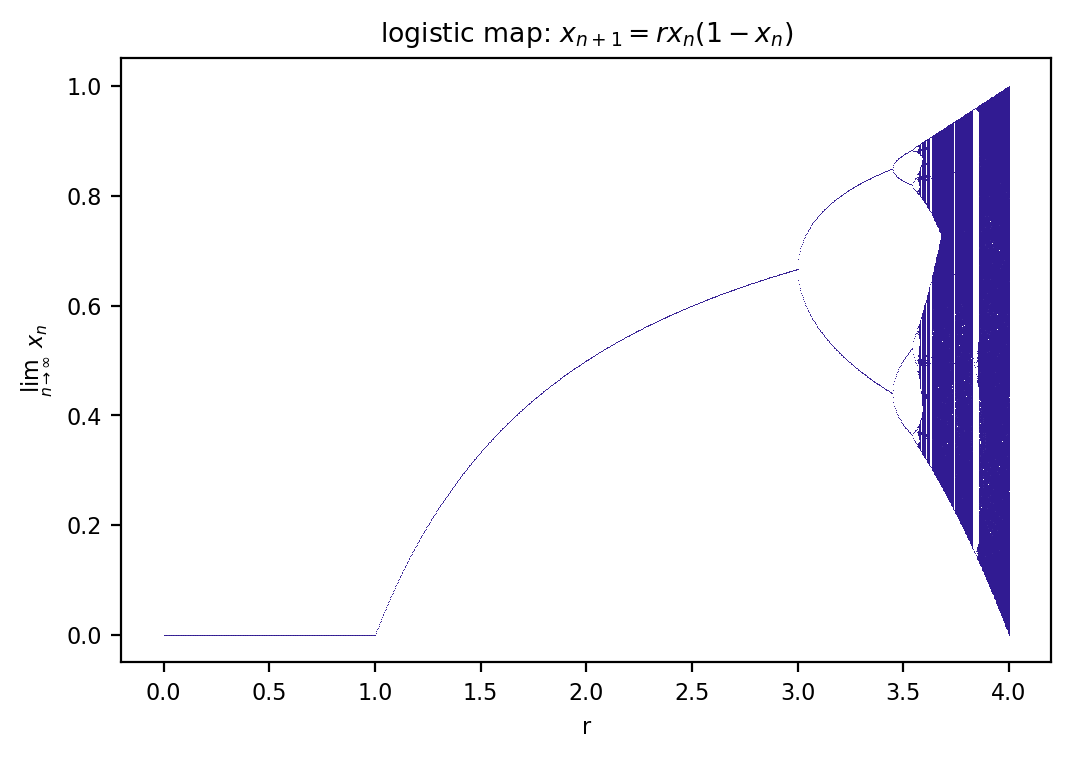

In [285]:
plt.figure(figsize=(6, 4), dpi=200)
plt.rcParams.update({'font.size': 8})
plt.scatter(lim_points[0], lim_points[1], c='#311B92', s = 0.5, marker = '.', alpha = 1, linewidths = 0)
plt.xlabel('r')
plt.ylabel('$\lim_{n \\rightarrow \infty}~x_n$')
plt.title('logistic map: $x_{n+1} = r x_n (1 - x_n)$')
plt.savefig('./test.png', dpi = 200, format = 'png')
plt.show()

In [243]:
r = np.linspace(3.5, 4, 1200)
rs = np.split(r, 4)

# create threads (out side of the loop to prevent memory leak)
pool = Pool(processes = 4)

# set timer
start_time = time.time()

# calculate
results = pool.map(logistic_map_lim_points_child, rs)

# close threads
pool.close()

# processing results
lim_points = np.array([[], []])
for result in results:
    lim_points = np.concatenate((lim_points, result), axis=1)

# print elapsed time
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

Time consuming: 87.435s.


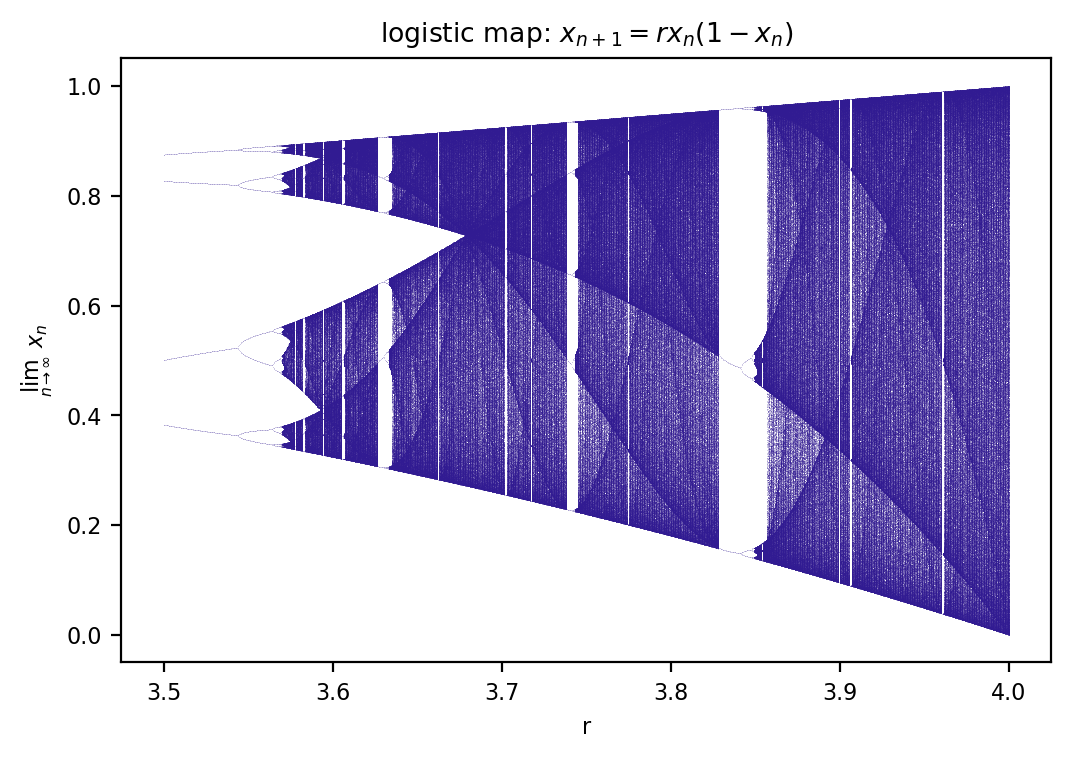

In [247]:
plt.figure(figsize=(6, 4), dpi=200)
plt.rcParams.update({'font.size': 8})
plt.scatter(lim_points[0], lim_points[1], c='#311B92', s = 0.08, marker = '.', alpha = 1, linewidths = 0)
plt.xlabel('r')
plt.ylabel('$\lim_{n \\rightarrow \infty}~x_n$')
plt.title('logistic map: $x_{n+1} = r x_n (1 - x_n)$')
plt.savefig('./test.png', dpi = 200, format = 'png')
plt.show()

In [300]:
logistic_map_lim_point(0, N_tail = 1000, decimal = 4).shape[1]

1

In [340]:
def logistic_map_lim_points_density_child(r, N = 500000):
    lim_points_density = []
    for R in r:
        lim_points_density.append(logistic_map_lim_point(R, N, N_tail = 5000, decimal = 4).shape[1])
    return np.array(lim_points_density)

In [341]:
r = np.linspace(0, 4, 1801)
rs = np.split(r[1:], 6)

# create threads (out side of the loop to prevent memory leak)
pool = Pool(processes = 6)

# set timer
start_time = time.time()

# calculate
results = pool.map(logistic_map_lim_points_density_child, rs)

# close threads
pool.close()

# processing results
lim_points_density = np.array([1])
for result in results:
    lim_points_density = np.concatenate((lim_points_density, result), axis=0)

# print elapsed time
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

Time consuming: 111.779s.


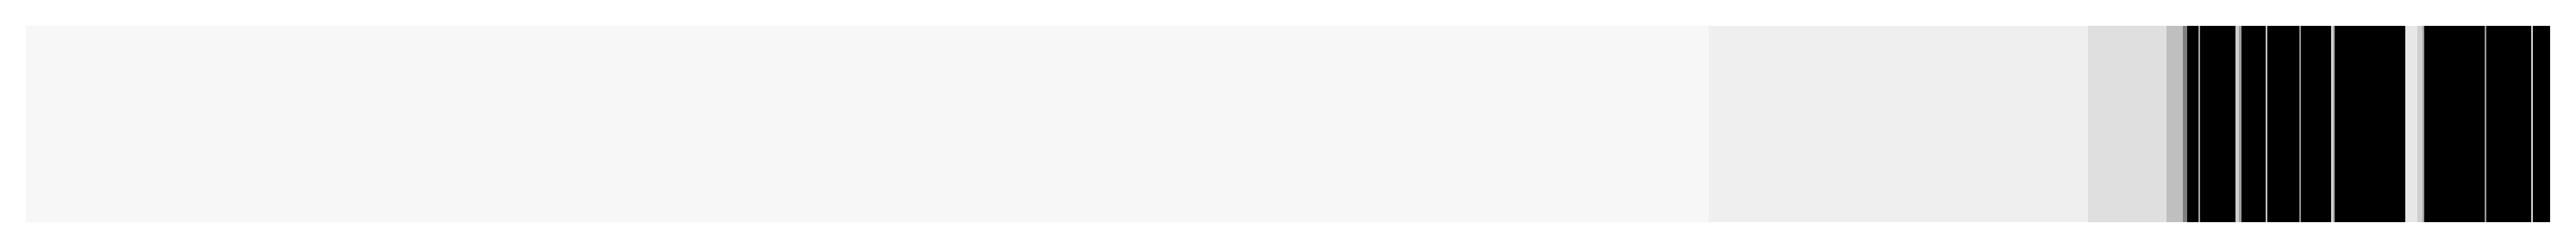

In [425]:
plt.figure(figsize=(10, 1), dpi=300)
plt.rcParams.update({'font.size': 8})
#plt.scatter(lim_points[0], lim_points[1], c='#311B92', s = 0.08, marker = '.', alpha = 1, linewidths = 0)
#plt.plot(r, lim_points_density, 's', markersize = 1)
grid_r, grid_y = np.meshgrid(r, np.linspace(0, 1, 11))
grid_density = np.meshgrid(lim_points_density, np.ones(11))[0]
plt.pcolormesh(grid_r, grid_y, grid_density, vmax=32, vmin=0, cmap='binary')
plt.xlim(1, 4)
plt.axis('off')
#plt.ylim(0, 35)
#plt.xlabel('r')
#plt.ylabel('$\lim_{n \\rightarrow \infty}~x_n$')
#plt.title('logistic map: $x_{n+1} = r x_n (1 - x_n)$')
plt.tight_layout()
plt.savefig('./logistic_map_density_stripe.png', dpi = 300, format = 'png')
plt.show()

In [441]:
r = np.linspace(3, 4, 1800)
rs = np.split(r, 6)

# create threads (out side of the loop to prevent memory leak)
pool = Pool(processes = 6)

# set timer
start_time = time.time()

# calculate
results = pool.map(logistic_map_lim_points_density_child, rs)

# close threads
pool.close()

# processing results
lim_points_density = np.array([])
for result in results:
    lim_points_density = np.concatenate((lim_points_density, result), axis=0)

# print elapsed time
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

Time consuming: 93.047s.


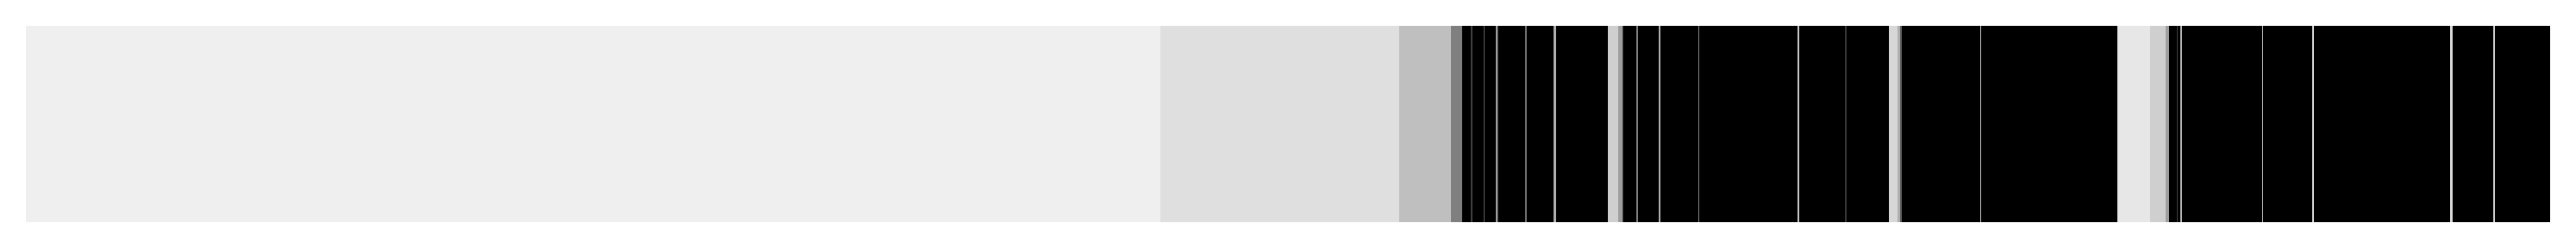

In [451]:
plt.figure(figsize=(10, 1), dpi=300)
plt.rcParams.update({'font.size': 8})
#plt.scatter(lim_points[0], lim_points[1], c='#311B92', s = 0.08, marker = '.', alpha = 1, linewidths = 0)
#plt.plot(r, lim_points_density, 's', markersize = 1)
grid_r, grid_y = np.meshgrid(r, np.linspace(0, 1, 11))
grid_density = np.meshgrid(lim_points_density, np.ones(11))[0]
plt.pcolormesh(grid_r, grid_y, grid_density, vmax=32, vmin=0, cmap='binary')
plt.xlim(3, 4)
plt.axis('off')
#plt.ylim(0, 35)
#plt.xlabel('r')
#plt.ylabel('$\lim_{n \\rightarrow \infty}~x_n$')
#plt.title('logistic map: $x_{n+1} = r x_n (1 - x_n)$')
plt.tight_layout()
#plt.savefig('./logistic_map_density_stripe.png', dpi = 300, format = 'png')
plt.show()

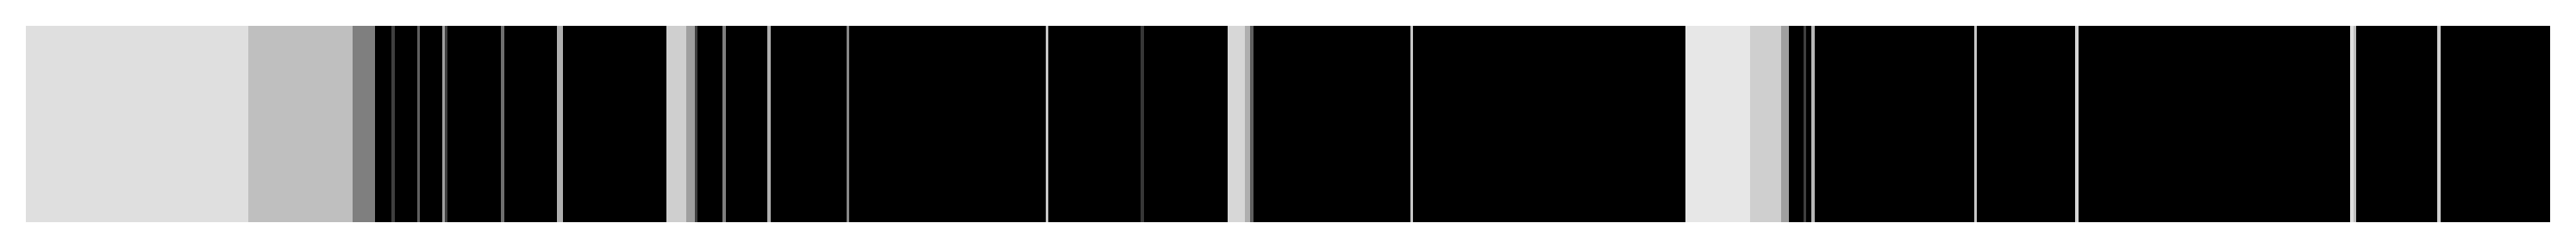

In [455]:
plt.figure(figsize=(10, 1), dpi=300)
plt.rcParams.update({'font.size': 8})
#plt.scatter(lim_points[0], lim_points[1], c='#311B92', s = 0.08, marker = '.', alpha = 1, linewidths = 0)
#plt.plot(r, lim_points_density, 's', markersize = 1)
grid_r, grid_y = np.meshgrid(r, np.linspace(0, 1, 11))
grid_density = np.meshgrid(lim_points_density, np.ones(11))[0]
plt.pcolormesh(grid_r, grid_y, grid_density, vmax=32, vmin=0, cmap='binary')
plt.xlim(3.5, 4)
plt.axis('off')
#plt.ylim(0, 35)
#plt.xlabel('r')
#plt.ylabel('$\lim_{n \\rightarrow \infty}~x_n$')
#plt.title('logistic map: $x_{n+1} = r x_n (1 - x_n)$')
plt.tight_layout()
#plt.savefig('./logistic_map_density_stripe.png', dpi = 300, format = 'png')
plt.show()

In [482]:
r = np.linspace(1, 4, 6001)
rs = np.split(r[1:], 6)

# create threads (out side of the loop to prevent memory leak)
pool = Pool(processes = 6)

# set timer
start_time = time.time()

# calculate
results = pool.map(logistic_map_lim_points_density_child, rs)

# close threads
pool.close()

# processing results
lim_points_density = np.array([1])
for result in results:
    lim_points_density = np.concatenate((lim_points_density, result), axis=0)

# print elapsed time
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

Time consuming: 340.859s.


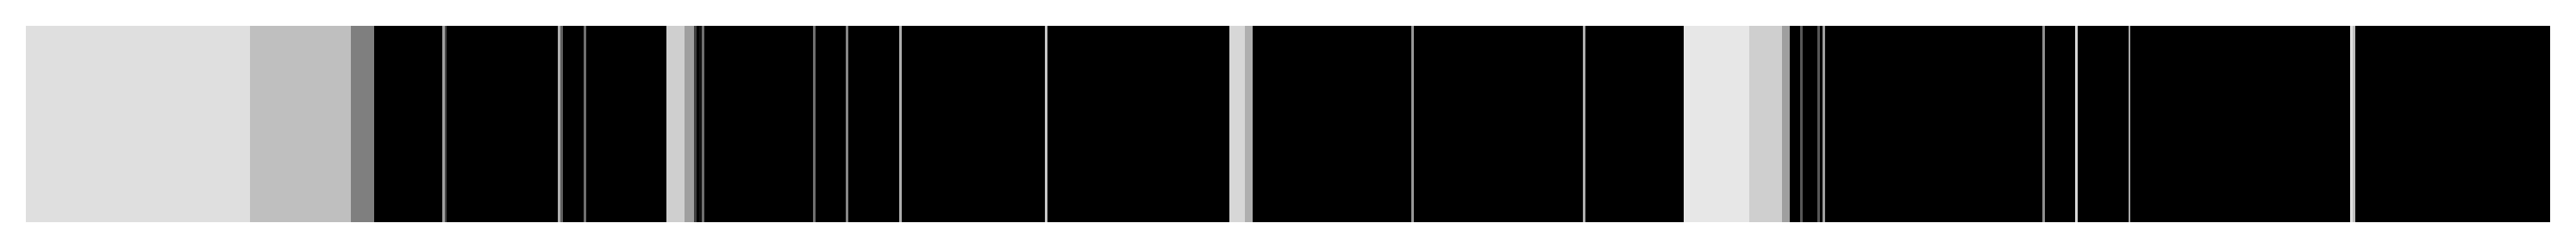

In [492]:
plt.figure(figsize=(10, 1), dpi=300)
plt.rcParams.update({'font.size': 8})
#plt.scatter(lim_points[0], lim_points[1], c='#311B92', s = 0.08, marker = '.', alpha = 1, linewidths = 0)
#plt.plot(r, lim_points_density, 's', markersize = 1)
grid_r, grid_y = np.meshgrid(r, np.linspace(0, 1, 11))
grid_density = np.meshgrid(lim_points_density, np.ones(11))[0]
plt.pcolormesh(grid_r, grid_y, grid_density, vmax=32, vmin=0, cmap='binary')
#plt.pcolormesh(grid_r, grid_y, grid_density, vmax=32, vmin=0, cmap='binary')
plt.xlim(3.5, 4)
plt.axis('off')
#plt.ylim(0, 35)
#plt.xlabel('r')
#plt.ylabel('$\lim_{n \\rightarrow \infty}~x_n$')
#plt.title('logistic map: $x_{n+1} = r x_n (1 - x_n)$')
plt.tight_layout()
#plt.savefig('./logistic_map_density_stripe.png', dpi = 300, format = 'png')
plt.show()

In [506]:
def logistic_map_limits(r, N = 500000, N_tail = 5000, decimal = 4):
    x_series = []
    x_series.append(0.01)

    for i in range(N):
        x_series.append(r * x_series[-1] * (1 - x_series[-1]))

    x_series_lim = np.around(x_series[-N_tail:], decimal)
    x_series_lim_unique = np.unique(x_series_lim)
    return x_series_lim_unique

In [517]:
logistic_map_limits(3.5)

array([0.3828, 0.5009, 0.8269, 0.875 ])

In [519]:
def logistic_map_limits_child(r, N = 500000):
    limits = []
    for R in r:
        limits.append(logistic_map_limits(R, N, N_tail = 5000, decimal = 4))
    return limits

In [521]:
limits = logistic_map_limits_child(np.linspace(2, 3.5, 10))

In [534]:
np.append(limits[7], 100)

array([  0.5263,   0.7895, 100.    ])

In [541]:
def r_lim_combiner(r, limits):
    rrs = np.array([])
    lim_points = np.array([])
    counts = np.array([])
    for i in range(len(r)):
        count = len(limits[i])
        rrs = np.append(rrs, r[i] * np.ones(count))
        lim_points = np.append(lim_points, limits[i])
        counts = np.append(counts, count)
    return rrs, lim_points, counts

In [542]:
r = np.linspace(2, 3.5, 10)

In [543]:
r_lim_combiner(r, limits)

(array([2.        , 2.16666667, 2.33333333, 2.5       , 2.66666667,
        2.83333333, 3.        , 3.        , 3.16666667, 3.16666667,
        3.33333333, 3.33333333, 3.5       , 3.5       , 3.5       ,
        3.5       ]),
 array([0.5   , 0.5385, 0.5714, 0.6   , 0.625 , 0.6471, 0.6663, 0.667 ,
        0.5263, 0.7895, 0.4697, 0.8303, 0.3828, 0.5009, 0.8269, 0.875 ]),
 array([1., 1., 1., 1., 1., 1., 2., 2., 2., 4.]))

In [619]:
r = np.linspace(1, 4, 6001)
rs = np.split(r[1:], 6)

# create threads (out side of the loop to prevent memory leak)
pool = Pool(processes = 6)

# set timer
start_time = time.time()

# calculate
results = pool.map(logistic_map_limits_child, rs)

# close threads
pool.close()

# processing results
limits = [np.array([0])]
for result in results:
    limits = limits + result

# print elapsed time
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

Time consuming: 453.510s.


In [620]:
# convert results
rrs, lim_points, counts = r_lim_combiner(r, limits)

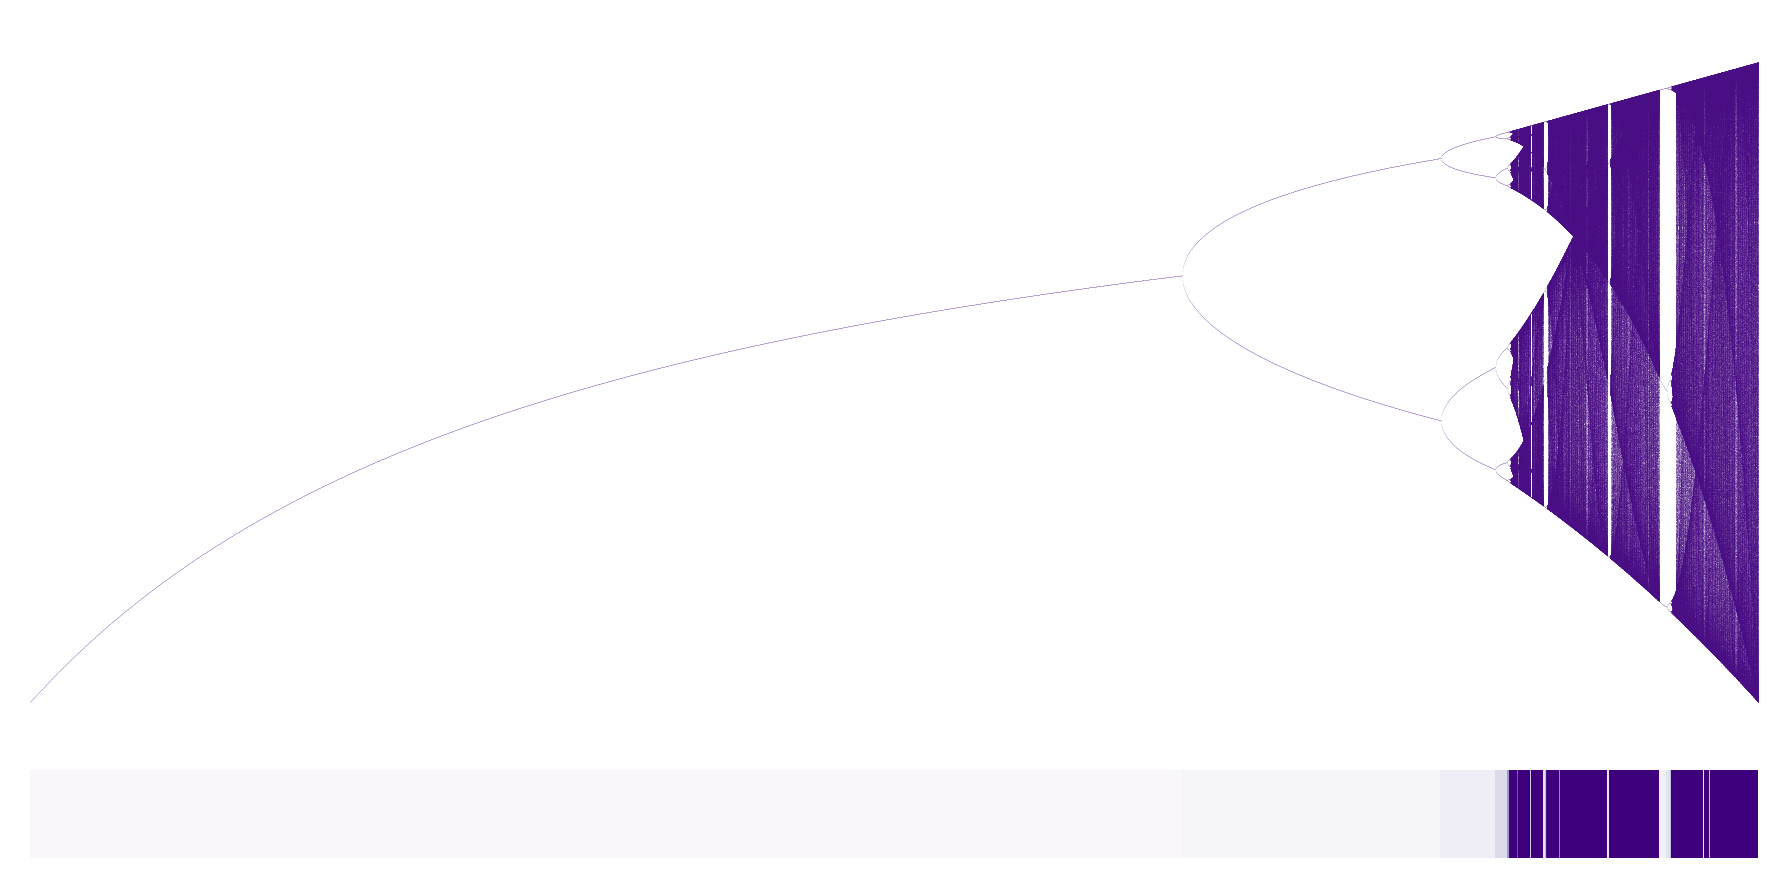

In [625]:
from matplotlib import gridspec

plt.figure(figsize=(6, 3), dpi=300)
gs = gridspec.GridSpec(2, 1, height_ratios=[8, 1])

plt.subplot(gs[0])
plt.scatter(rrs, lim_points, c=[[0.247, 0.0, 0.490, 1]], s = 0.02, marker = '.', alpha = 1, linewidths = 0)
plt.axis('off')
plt.xlim(1,4)

plt.subplot(gs[1])
grid_r, grid_y = np.meshgrid(r, np.linspace(0, 1, 11))
grid_density = np.meshgrid(counts, np.ones(11))[0]
plt.pcolormesh(grid_r, grid_y, grid_density, vmax=32, vmin=0, cmap='Purples')
plt.axis('off')
plt.xlim(1,4)

plt.tight_layout()
plt.savefig('./logistic_map_with_density.png', dpi = 300, format = 'png')

plt.show()

In [626]:
plt.show()

In [594]:
cmap = plt.get_cmap("Purples")

In [603]:
import matplotlib as mpl
from matplotlib import cm

In [604]:
class MplColorHelper:
    
  def __init__(self, cmap_name, start_val, stop_val):
    self.cmap_name = cmap_name
    self.cmap = plt.get_cmap(cmap_name)
    self.norm = mpl.colors.Normalize(vmin=start_val, vmax=stop_val)
    self.scalarMap = cm.ScalarMappable(norm=self.norm, cmap=self.cmap)

  def get_rgb(self, val):
    return self.scalarMap.to_rgba(val)

In [609]:
COL = MplColorHelper('Purples', 0, 1)

In [611]:
COL.get_rgb(11)

(0.24705882352941178, 0.0, 0.49019607843137253, 1.0)

In [21]:
x_series = []
r = 3.1

x_series.append(0.1)

for i in range(1000):
    x_series.append(r * x_series[-1] * (1 - x_series[-1]))
    
x_series_lim_4 = np.around(x_series, 4)
#np.unique(x_series_lim_4)

In [22]:
print(np.around(x_series, 4))

[0.1    0.279  0.6236 ... 0.558  0.7646 0.558 ]


In [23]:
for string in ["{:0.4f}".format(x) for x in x_series[-10:]]:
    print(string, end=" ")

0.7646 0.5580 0.7646 0.5580 0.7646 0.5580 0.7646 0.5580 0.7646 0.5580 